In [2]:
import matplotlib.pyplot as plt
import torch
from taker import Model
from taker.texts import prepare

m1 = Model("google/gemma-2b", dtype="fp16", limit=1000)
# m1 = Model("microsoft/phi-3-mini-4k-instruct", dtype="fp16", limit=1000)
# m2 = Model("microsoft/phi-3-mini-4k-instruct", dtype="nf4", limit=1000)
# m3 = Model("microsoft/phi-3-mini-4k-instruct", dtype="hqq4_1", limit=1000)
# m4 = Model("microsoft/phi-3-mini-4k-instruct", dtype="int8", limit=1000)
m = m1

model-00001-of-00002.safetensors:  73%|#######2  | 3.60G/4.95G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/67.1M [00:00<?, ?B/s]

`config.hidden_act` is ignored, you should use `config.hidden_activation` instead.
Gemma's activation function will be set to `gelu_pytorch_tanh`. Please, use
`config.hidden_activation` if you want to override this behaviour.
See https://github.com/huggingface/transformers/pull/29402 for more details.


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/137 [00:00<?, ?B/s]

Loaded model 'google/gemma-2b' with fp16:
- Added 288 hooks across 18 layers


In [3]:
with torch.no_grad():
    ds, label, _ = prepare("pile")
    for data in ds:
        text = data[label]
        ids  = m1.get_ids(text)
        res1 = m1.get_residual_stream(text)
        # res2 = m2.get_residual_stream(text)
        # res4 = m4.get_residual_stream(text)
        break

In [4]:
# torch.save(res1, "res_fp16.pt")
# res1 = torch.load("res_fp16.pt")

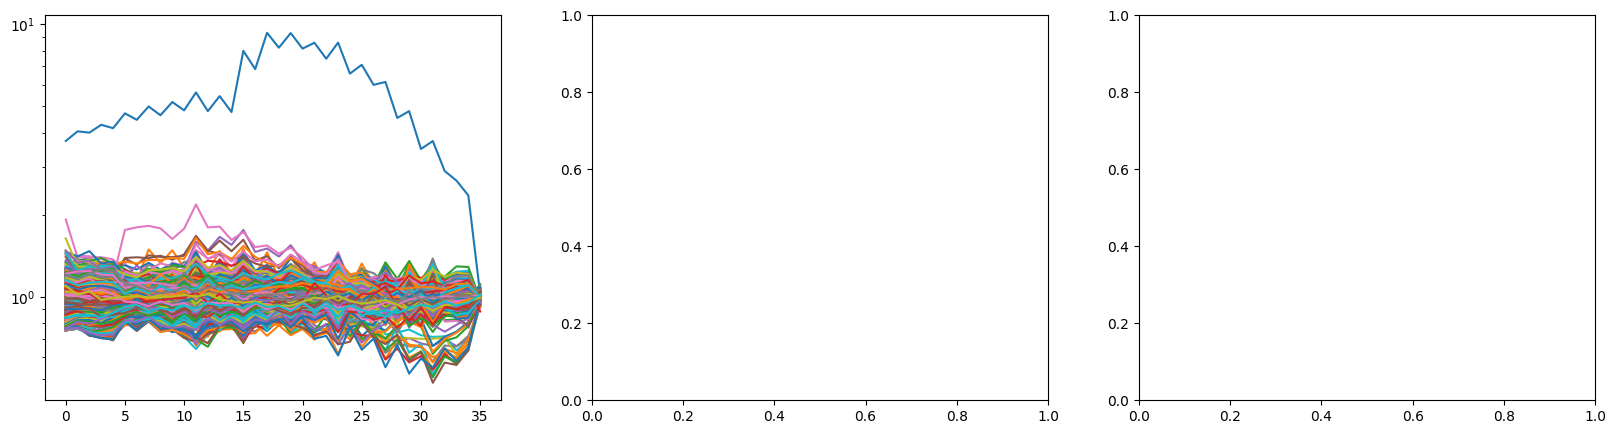

In [5]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=1, ncols=3, figsize=(20, 5))
with torch.no_grad():
    diff = (res1.norm(dim=-1) / res1.norm(dim=-1).mean(dim=-1, keepdim=True) )[0, 1:]
    ax1.semilogy(diff.cpu().numpy())
# with torch.no_grad():
#     diff = ((res1-res4).norm(dim=-1) / res1.norm(dim=-1).mean(dim=-1, keepdim=True) )[0, 1:]
#     ax3.semilogy(diff.cpu().numpy())
# with torch.no_grad():
#     diff = ((res1-res2).norm(dim=-1) / res1.norm(dim=-1).mean(dim=-1, keepdim=True) )[0, 1:]
#     ax2.semilogy(diff.cpu().numpy())

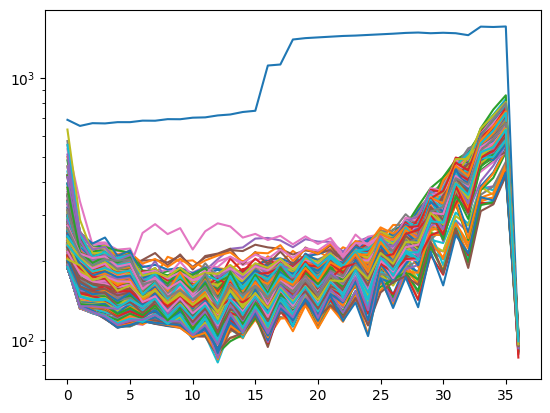

In [6]:
#plt.semilogy( res1.norm(dim=-1).mean(dim=-1)[0].cpu().numpy() )
plt.semilogy( res1.norm(dim=-1)[0].cpu().numpy() )

In [9]:
idx = torch.where( res1.norm(dim=-1)[0,20] > 3e2 )[0]
print(m.tokenizer.decode(ids[0][idx]))

example_str = ""
for index in idx:
    index = index.item()
    if index > 0:
        example_str  = m.tokenizer.decode(ids[0, index-2:index+2])
    print(f"{index}: `{m.tokenizer.decode(ids[0, index])}` in context: `{example_str}`")
    # print(index.item(), m2.tokenizer.decode(ids[0, index]))

<bos>
0: `<bos>` in context: ``
